# Calculate the average mean in time of ssh or any other 2D variable

In [1]:
# Importing all libraries except trackeddy.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
from trackeddy.trackeddy import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
count=0
timeavessh=zeros([345-306,shape(eta)[1],shape(eta)[2]])
for tt in range(306,345):
    ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(tt)+'/rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]*100
    etamean=mean(eta,axis=0)
    timeavessh[count,:,:]=etamean[:,:]
    count=count+1

In [4]:
filename='/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc'
var = mean(timeavessh,axis=0)
varname='SSH_mean'
units='Centimeters [cm]'
nc_description='SSH mean of the Southern Ocean over 10 years'
dim='2D'
vargeonc(filename,lat,lon,var,tt,varname,nc_description=nc_description,units=units,dt='',dim=dim)

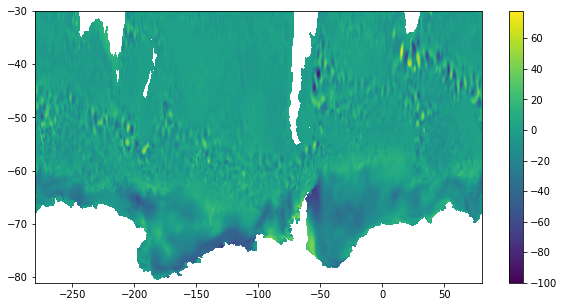

In [5]:
figure(figsize=(10,5))
pcolormesh(lon,lat,eta[0,:,:]-mean(timeavessh,axis=0))
colorbar()